### Assignment - 30 - MACHINE LEARNING - 10
## By Prakash Ghosh
---

### Problem Statement:  Transform iris data into 3 dimensions and plot a 3d
---

* Chart with transformed dimensions and color each data point with specific class.
* Hint:
* import numpy as np
* import matplotlib.pyplot as plt
* from mpl_toolkits.mplot3d import Axes3D
* from sklearn import decomposition
* from sklearn import datasets

In [1]:
# Loading Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import decomposition, datasets

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### Load Data

In [2]:
# Load IRIS Dataset
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(URL)

In [5]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,target
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [6]:
col_names=['sepal_length','sepal_width','petal_length','petal_width','target']
df.columns=col_names
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,target
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


#### Analyze Data

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### 3-D Analysis

In [9]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [14]:
# Separating out the target and Standardizing
x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

In [18]:
# PCA Analysis
pca = PCA(n_components=3)
pc = pca.fit_transform(x)
pc_Df = pd.DataFrame(data = pc, columns = ['PC_1', 'PC_2','PC_3'])
pc_Df.head(10)

,PC_1,PC_2,PC_3
0,-2.107950,-0.644276,-0.228768
1,-2.387971,-0.305833,0.049672
2,-2.324879,-0.562923,0.097142
3,-2.405086,0.687591,0.018819
4,-2.083204,1.530252,0.027757
5,-2.463685,0.087954,0.340195
6,-2.251750,0.259644,-0.084873
7,-2.364581,-1.082557,0.152275
8,-2.209463,-0.437077,-0.248514
9,-2.178620,1.082210,-0.266889


In [20]:
# target df adding target variable
target_df = pd.concat([pc_Df, df[['target']]], axis = 1)
target_df.head(5)

,PC_1,PC_2,PC_3,target
0,-2.107950,-0.644276,-0.228768,Iris-setosa
1,-2.387971,-0.305833,0.049672,Iris-setosa
2,-2.324879,-0.562923,0.097142,Iris-setosa
3,-2.405086,0.687591,0.018819,Iris-setosa
4,-2.083204,1.530252,0.027757,Iris-setosa


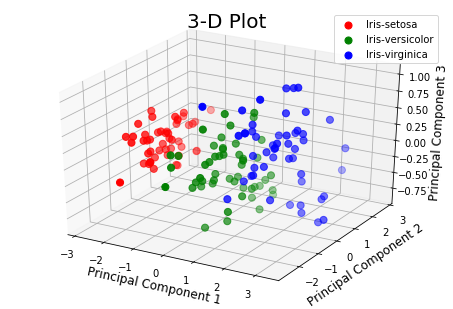

In [23]:
# 3D Data with Plot

#Set the 3d Plot
fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
fig.add_subplot(211, projection='3d')
ax = Axes3D(fig)

#Set the Label
ax.set_xlabel('Principal Component 1', fontsize = 12)
ax.set_ylabel('Principal Component 2', fontsize = 12)
ax.set_zlabel('Principal Component 3', fontsize = 12)
ax.set_title('3-D Plot', fontsize = 20)

#Set the Color of 3D
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

#Loop through and Plot 3D
for target, color in zip(targets,colors):
    indicesToKeep = target_df['target'] == target
    ax.scatter3D(target_df.loc[indicesToKeep, 'PC_1']
               ,target_df.loc[indicesToKeep, 'PC_2']
               ,target_df.loc[indicesToKeep, 'PC_3']
               , c = color
               , s = 50)

ax.legend(targets)  # legend
ax.grid()           # Grid